# Question of Interest    Fraud Detection Case Study - Prediction Whether Fraud Or Not
***Due data: October 29, 2023***
Notebook 2: Feature Engineering

Objective: Transform and engineer features to improve the model's performance and predictive power.

Steps recommended:
1.	Feature Transformation:
a.	Handle missing values (if any) using appropriate techniques like imputation or removal based on justification.
b.	Encode categorical variables using suitable encoding methods (label encoding, one-hot encoding) and explain the choice for each variable.
c.	Scale numerical features using techniques like Min-Max scaling or Standardization, etc.
2.	Feature Creation:
a.	Create new features from existing ones if it adds value to the model (e.g., aggregations, interaction terms).
b.	Justify the creation of each new feature based on its relevance to fraud detection.
3.	Feature Selection:
a.	Use techniques like correlation, feature importance from tree-based models, or other relevant methods to select the most important features.
b.	Explain the rationale behind selecting specific features for the model.
4.	Summary:


### Importing Python Libraries

In [1]:
#For linting standard and code error check
!pip install pycodestyle pyflakes shap sweetviz haversine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 43.9 MB/s eta 0:00:00


In [83]:
#Importing all the python libraries
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV,RidgeClassifier
from sklearn.linear_model import ElasticNet, ElasticNetCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
from geopy import distance
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2
#Shap Import
import shap



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df = pd.read_parquet('gdrive/My Drive/data.parquet')
print(df.shape)
df.head(2)

(1852394, 22)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [6]:
##Found only Fraud Transactions
dfFraud=df.loc[(df['is_fraud'] == 1)]
dfFraud.shape

(9651, 22)

In [7]:
##Found only Non-Fraud Transactions
dfNonFraud=df.loc[(df['is_fraud'] == 0)]
dfNonFraud.shape


(1842743, 22)

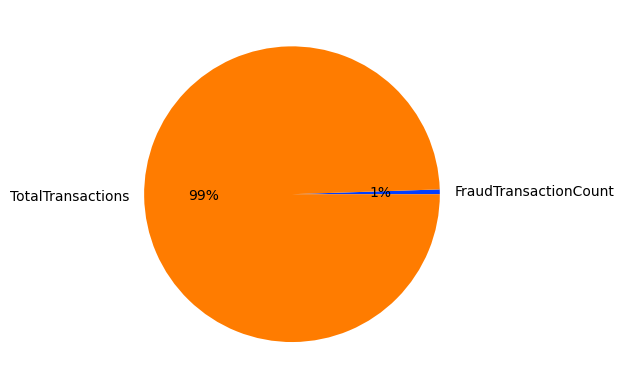

In [ ]:
# declaring data
data = [len(dfFraud),len(df)]
keys = ['FraudTransactionCount', 'TotalTransactions']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

### Functions

In [8]:
def haversine_distance(lat1:float, lon1:float, lat2:float, lon2:float)->float:
    """[Uses the haversine formula to calculate the distance between
    two points on a sphere]

    Args:
        lat1 (float): [latitude of first point]
        lon1 (float): [longitude of first point]
        lat2 (float): [latitude of second point]
        lon2 (float): [latitue of second point]

    Returns:
        dist (float): [Distance between two GPS points in miles]

    """
    from math import radians, cos, sin, asin, sqrt
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3956 # Radius of earth in miles. Use 6371 for kilometers
    return c * r

In [9]:
def transform_data(data, cols_leave):
    data = data.astype({i:'category' for i in cols_leave})
    data[cols_leave] = data[cols_leave].apply(lambda x:x.cat.codes)
    data = data.astype({i:'int' for i in cols_leave})
    return data

def feature_importance_plot(model, max_features,height= 0.8):
    fig,ax=plt.subplots(figsize=(10,10))
    xgb.plot_importance(model,max_num_features=max_features, height=height,ax=ax)
    return plt.show()

def feature_gain_plot(model, max_features=20):
    imp_type ='gain'
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    xgb.plot_importance(model, ax=ax, importance_type=imp_type, max_num_features=max_features)
    plt.title('Feature importance - ' + imp_type, fontsize=18, weight='bold')
    plt.ylabel('Features', fontsize=16, weight='bold')
    plt.xlabel('F Score', fontsize=16, weight='bold')
    plt.yticks(fontsize=14, weight='bold')
    return plt.show()

def roc_plot(fpr,tpr,roc_auc):
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
            label='ROC curve (area = {:0.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plt.scatter(medium['fpr'], medium['tpr'], marker='o', color='black', label='mid_thres = %.4f'%(medium['threshold']))
    # plt.scatter(high['fpr'], high['tpr'], marker='o', color='red', label='high_thres = %.4f'%(high['threshold']))
    # plt.scatter(low['fpr']/100, low['tpr']/100, marker='o', color='green', label='low_thres = %.4f'%(low['threshold']))
    plt.grid()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return plt.show()

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

def precision_recall_plot(y_test, y_prob, y_hat):
    precision, recall, threshodls = precision_recall_curve(y_test,y_prob)
    lr_f1, lr_auc = f1_score(y_test, y_hat), auc(recall, precision)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(rotation=40)
    plt.yticks(rotation=40)
    ikchosp = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0,1], [ikchosp,ikchosp], linestyle='--', color = 'lightgrey')
    plt.plot([1,0], [0,1], linestyle='--')
    # pyplot.scatter(medium['recall']/100, medium['precision']/100, marker='o', color='black', label='mid_thres = %.4f'%(medium['threshold']))
    # pyplot.scatter(high['recall']/100, high['precision']/100, marker='o', color='red', label='high_thres = %.4f'%(high['threshold']))
    # pyplot.scatter(low['recall']/100, low['precision']/100, marker='o', color='green', label='low_thres = %.4f'%(low['threshold']))
    plt.plot(recall,
             precision,
             marker=',',
             label='f1=%.3f\nauc=%.3f'%(lr_f1,lr_auc),
             color='blue')
    # axis labels
    plt.grid()
    # pyplot.xlabel('Recall \n\n Optimal Precision = %.3f\nOptimal Recall = %.3f'%(medium['recall'],medium['precision']))
    plt.ylabel('Precision')
    plt.legend()
    # show the plot
    plt.show()

def select_cols_type(dataset, dtype):
    masks=(dataset.dtypes==dtype)
    return dataset.columns[masks].tolist()

def chi2_test_df(data, cat_columns):
    chi2_results = []
    df = data.copy(deep=True)
    df.dropna(inplace = True)
    for i in cat_columns:
        obs = pd.crosstab(index = df[i], columns = df['termflag'])
        chi2_results.append([i, chi2_contingency(obs)[0].round(2), chi2_contingency(obs)[1].round(4), chi2_contingency(obs)[2]])
    chi2_results_df = pd.DataFrame(chi2_results, columns=['Feature_name','chi-square-value','p-value','degrees of freedom'])
    return chi2_results_df

def ttest_df(data, cont_columns):
    ttest_results=[]
    df = data.copy(deep=True)
    df.dropna(inplace=True)
    for i in cont_columns:
        stat, p = ttest_ind(df[i][df.termflag==0], df[i][df.termflag==1])
        ttest_results_df = pd.DataFrame(ttest_results, columns = str('features,t-stats,p-value').split(','))
        return ttest_results_df
def f_score(df,label):
    chi_values=chi2(df,label)
    score = list(chi_values[0])
    feat = df.columns.tolist()
    fscore_df = pd.DataFrame({"Feature":feat, "Score":score})
    fscore_df.sort_values(by="Score", ascending=False,inplace = True)
    fscore_df.reset_index(drop=True, inplace=True)
    return fscore_df


In [10]:
def f_score(df,label):
    chi_values=chi2(df,label)
    score = list(chi_values[0])
    feat = df.columns.tolist()
    fscore_df = pd.DataFrame({"Feature":feat, "Score":score})
    fscore_df.sort_values(by="Score", ascending=False,inplace = True)
    fscore_df.reset_index(drop=True, inplace=True)
    return fscore_df


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score


def acc_score_num(df,label,f_score_val,feat_list):
    Score = pd.DataFrame({"Classifier":classifiers})
    df2 = None
    for k in range(len(feat_list)):
        df2 = feat_select(df,f_score_val,feat_list[k])
        X_train,X_test,Y_train,Y_test = split(df2,label)
        j = 0
        acc = []
        for i in models:
            model = i
            model.fit(X_train,Y_train)
            predictions = model.predict(X_test)
            acc_val = accuracy_score(Y_test,predictions)
            acc.append(acc_val)
            j = j+1
        feat = str(feat_list[k])
        Score[feat] = acc
    return Score
def plot2(df,l1,l2,p1,p2,c = "b"):
    feat = []
    feat = df.columns.tolist()
    feat = feat[1:]
    plt.figure(figsize = (16, 18))
    for j in range(0,df.shape[0]):
        value = []
        k = 0
        for i in range(1,len(df.columns.tolist())):
            value.append(df.iloc[j][i])
        plt.subplot(4, 4,j+1)
        ax = sns.pointplot(x=feat, y=value,color = c ,markers=["."])
        plt.text(p1,p2,df.iloc[j][0])
        plt.xticks(rotation=90)
        ax.set(ylim=(l1,l2))
        k = k+1
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

def feat_select(df,f_score_val,num):
    feat_list = list(f_score_val["Feature"][:num])
    return df[feat_list]


### Missing Value Check Functions

In [11]:
# Null and NaN value check

def check_NA(data):

    #Check NA values and % of Na values in each column

    #null value sum
    null_sum = data.isna().sum()
    total = null_sum.sort_values(ascending=False)
    percent = ((null_sum/len(data.index))*100).round(2).sort_values(ascending=False)
    df_NA =  pd.concat([total, percent],axis=1, keys=['Number of NA','Percent NA'])
    #drop rows with no missing vals
    df_NA = df_NA[(df_NA.T !=0).any()]
    return df_NA

def select_cols_type(dataset, dtype):
    mks=(dataset.dtypes==dtype)
    return dataset.columns[mks].tolist()


In [12]:
#Encoding Character Variables
def CharEncoder(data):
    label=LabelEncoder()
    for c in  data.columns:
        if(data[c].dtype=='object'):
            data[c]=label.fit_transform(data[c])
    else:
        data[c]=data[c]

    return data

In [13]:
# Separating Dataframe into X,Y
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (Excluding transdatetime,is_fraud including all others)
    y: lable column
    """
    X = df.iloc[:, 1:21].values
    y = df.is_fraud.values
    return X, y

### Ensemble Model Functions

In [14]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model
    predicted = model.predict(X_test)

    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted)



In [55]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

### EDA-Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  object        
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    object        
 17  trans_num              object        
 18  unix_time             

In [ ]:
# Display general statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01
merch_long,1852394.0,-9.022794e+01,1.375969e+01,-1.666716e+02,-9.689944e+01,-8.744069e+01,-8.024511e+01,-6.695090e+01
is_fraud,1852394.0,5.210015e-03,7.199217e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
# Display datatype
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [ ]:
float_cols= select_cols_type(df, 'float')
int_cols= select_cols_type(df,'int')
object_cols= select_cols_type(df,'object')
na_values_int = check_NA(df[int_cols])
na_values_float = check_NA(df[float_cols])
na_values_obj = check_NA(df[object_cols])
#########################
numeric_cols=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64']]
object_cols =[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
#########################

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())


Rows     :  1852394
Columns  :  22

Features : 
 ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

Missing values :   0

Unique values :  
 trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long     

### Above Missing Value Analysis Found No Missing Values Found In the Parquet Data

### Missing Values/NULL/NaN Check

In [ ]:
# Check missing values of all rows
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### No Null Values Found

In [ ]:
miss_val=df.isna().sum()/len(df)*100

In [ ]:
print(miss_val)

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64


### No Nan Values Found

In [ ]:
# Create two dataframes with fraud and non-fraud data
df_fraud = df[df.is_fraud == 1]
df_non_fraud =df[df.is_fraud == 0]

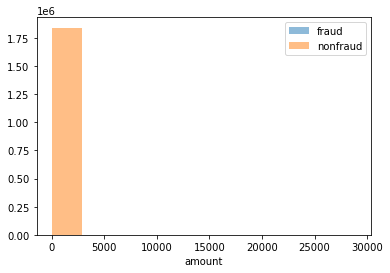

In [ ]:
# Plot histograms of the amounts in fraud and non-fraud data
plt.hist(df_fraud.amt, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amt, alpha=0.5, label='nonfraud')
plt.xlabel('amount')
plt.legend()
plt.show()

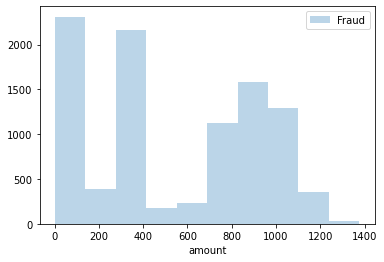

In [ ]:
# Plot histograms of the amounts in Fraud
plt.hist(df_fraud.amt, alpha=0.3, label='Fraud')
plt.xlabel('amount')
plt.legend()
plt.show()

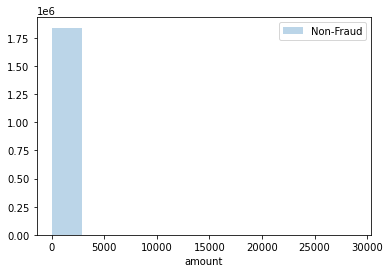

In [ ]:
# Plot histograms of the amounts in Non-Fraud
plt.hist(df_non_fraud.amt, alpha=0.3, label='Non-Fraud')
plt.xlabel('amount')
plt.legend()
plt.show()

### Correlation Analysis/ Feature Importance

In [ ]:
df2 = df

In [ ]:
Num_var=df2.loc[:,df.dtypes!=np.object]

In [ ]:
Num_var.head(2)

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0


In [ ]:
Num_var_one = Num_var.iloc[:,0:9]

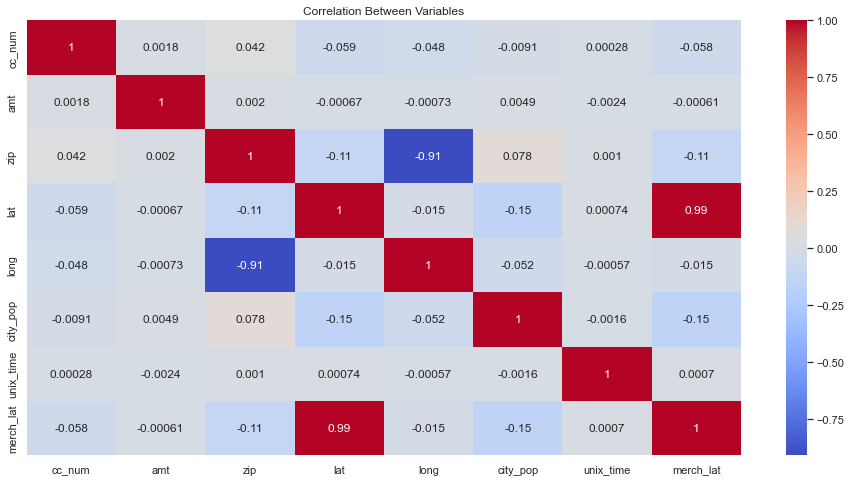

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(Num_var_one.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

### Seeing Lat Positive Correlations and Long Negative Correlations

In [ ]:
corr_attributes= df2[['cc_num','amt','zip','is_fraud']]

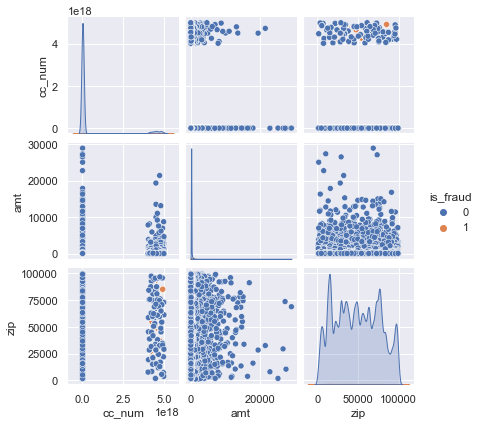

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.pairplot(corr_attributes, hue='is_fraud', height=2)

### Based on Correlation Plot and Association /ConFounding Variable after eliminated below dataframe selected

In [ ]:
df2.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [ ]:
X_sample=df[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud','gender','category']]

In [ ]:
Char_var= df2[['merchant','category','first','last','gender','street','city','state','job','dob','trans_num','amt']]

### Basic Dataset Train/Test/
### Features Selection and Analysis

In [15]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [16]:
train = df[df['trans_date_trans_time']<=pd.to_datetime('2020-06-21 12:13:37')]
test  = df[df['trans_date_trans_time']>=pd.to_datetime('2020-06-21 12:14:25')]

print('Shape of Dataset =', train.shape, test.shape)
print('Mean Fraud Rate  =', train['is_fraud'].mean(), test['is_fraud'].mean())

Shape of Dataset = (1296675, 22) (555719, 22)
Mean Fraud Rate  = 0.005788651743883394 0.0038598644278853163


In [29]:
#Filtering Data All Numerical Variables With Gender and Category, Since Other Categorical Variables are toomany Unique Values
train_filtered=train[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud']]

In [30]:
CharEncoder(train_filtered)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


In [42]:
#Filtering Data All Numerical Variables With Gender and Category, Since Other Categorical Variables are toomany Unique Values
train_filtered=train[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud']]

In [43]:
responsetest_filtered = 'is_fraud'
X_trained_filtered, y_trained_filtered = train_filtered.drop(responsetest_filtered, axis=1), train_filtered[responsetest_filtered]
print(X_trained_filtered.shape, y_trained_filtered.shape)

(1296675, 9) (1296675,)


In [46]:
CharEncoder(train_filtered)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


In [47]:
#Filtering Data All Numerical Variables With Gender and Category, Since Other Categorical Variables are toomany Unique Values
test_filtered=test[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud']]

In [48]:
responsetest_filtered = 'is_fraud'
X_test_filtered, y_test_filtered = test_filtered.drop(responsetest_filtered, axis=1), test_filtered[responsetest_filtered]
print(X_test_filtered.shape, y_test_filtered.shape)

(555719, 9) (555719,)


### Regularization

### Lasso

In [49]:
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_trained_filtered, y_trained_filtered)

LassoCV(cv=10, max_iter=100000)

In [50]:
alpha = lasso_cv.alpha_
alpha

97448237878501.64

In [52]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_trained_filtered, y_trained_filtered)

Lasso(alpha=97448237878501.64)

In [53]:
lasso.score(X_trained_filtered, y_trained_filtered)

0.0

In [54]:
lasso.score(X_test_filtered, y_test_filtered)

-0.0009675561843203173

In [56]:
print(adj_r2(X_trained_filtered, y_trained_filtered, lasso))

-6.940882957495731e-06


In [58]:
print(adj_r2(X_test_filtered, y_test_filtered, lasso))

-0.0009837673811978753


### Ridge

In [60]:
alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(X_trained_filtered, y_trained_filtered)

RidgeCV(alphas=array([2.80531799, 8.86453747, 6.70173564, 3.36005038, 3.44968689,
       3.12773117, 6.70918099, 2.60839272, 8.82788005, 6.32368008,
       0.77880655, 6.03621915, 4.4580029 , 7.1034085 , 1.88772739,
       4.78204767, 2.59621398, 2.09667192, 5.34431812, 3.45635709,
       4.15810878, 8.75949497, 4.75392881, 3.42551657, 8.25082367,
       8.44176291, 0.13299363, 6.61001256, 4.42662455, 4.83958589,
       2.96386593, 8.10759413, 0.20107263, 1.73660872, 8.01329475,
       0.93476948, 3.98667816, 2.3697754 , 1.97267878, 2.17025693,
       6.79436254, 9.91150218, 1.10691505, 8.44510065, 5.08739743,
       7.18652848, 5.57588671, 6.52039256, 3.64862468, 8.41664277]),
        cv=10)

In [63]:
alpha = ridge_cv.alpha_
alpha

9.911502177610151

In [89]:
print(adj_r2(X_trained_filtered, y_trained_filtered, lasso))

-6.940882957495731e-06


### Elastic Net

In [67]:
elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000)
elastic_net_cv.fit(X_trained_filtered, y_trained_filtered)

ElasticNetCV(cv=10, max_iter=100000)

In [68]:
alpha = elastic_net_cv.alpha_
alpha

194896475757003.3

In [69]:
elastic_net_cv.l1_ratio

0.5

In [70]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_trained_filtered, y_trained_filtered)

ElasticNet(alpha=194896475757003.3)

In [71]:
elastic_net.score(X_trained_filtered, y_trained_filtered)

0.0

In [72]:
elastic_net.score(X_test_filtered, y_test_filtered)

-0.0009675561843203173

In [74]:
print(adj_r2(X_trained_filtered, y_trained_filtered, elastic_net))

-6.940882957495731e-06


In [75]:
print(adj_r2(X_test_filtered, y_test_filtered, elastic_net))

-0.0009837673811978753


### Found all 51 states in the transactions and over 726 Merchants and Over multiples hundreds of Zip , City, Job ,Street,DOB, City_Population Not able to Encode also found no influence in Target Variable in my EDA Notebook

### Training /Test Datasets Consists of All Numerical Columns and Categorical Variables Gender and Category

In [ ]:
CharEncoder(X_sample)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,gender,category
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,8
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,4
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1,2
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,1,5
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,1,7
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,0,7
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,1,13


In [ ]:
y_sample=df[['is_fraud']]

In [ ]:
print(f'X shape: {X_sample.shape}\ny shape: {y_sample.shape}')


X shape: (1852394, 12)
y shape: (1852394, 1)


In [ ]:
# Run the prep_data function
X_sample, y_sample = prep_data(df)

### SMOTE

In [78]:
os = SMOTE(random_state=123)

os_data_X,os_data_y=os.fit_resample(X_trained_filtered,y_trained_filtered)

os_data_X = pd.DataFrame(data=os_data_X,columns=X_trained_filtered.columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# Logistic Regression:

1. Logistic regression is probably the most important supervised learning classification method.
2. Logistic regression makes an excellent baseline algorithm. It works well when the relationship between the features and the target aren’t too complex.
3. It produces feature weights that are generally interpretable, which makes it especially useful when you need to be able to explain the reasons for a decision.

***IS Scaling Necessay ??***
 To be safe, it is best to scale data.

***Should I remove outliers?***
Standardizing the inputs would reduce outliers’ effects.


***Which other assumptions really matter?***
Observations should be independent of each other.


***Should I do dimensionality reduction if there are lots of features?***
Recursive Feature Elimination help us remove the least important features.
***Alternatively, L1 regularization can drive less important feature weights to zero if we are using the saga solver.***


***Is multicollinearity in my features a problem?***
It is for interpretation of the feature importances. You can’t rely on the model weights to be meaningful when there is high correlation between the variables. Credit for affecting the outcome variable might go to just one of the correlated features.
There are many ways to test for multicollinearity.

The correlation coefficients is one of them however correlation coefficients alone are not sufficient to determine problematic multicollinearity with multiple features.


***Overfitting and Regulazation: ***

Overfitting is a phenomenon that occurs when a machine learning or statistics model is tailored to a particular dataset and is unable to generalise to other datasets i.e. performs poorely with test dataset.

***Regularisation*** is a process of introducing additional information in order to prevent overfitting.

***l1, l2 or L1 , L2 are penalty. ***  

L1 and L2 in logistic regression work by using gradient descent. Gradient descent is simply a method to find the ‘right’ coefficients through iterative updates using the value of the gradient.

We want less than perfectly fit model, with the hope that our model can also get close predictions with other test data.  

To make the model less perfect we introduce some penalty term λ which makes us shift away from the very w (weight) that was going to cause us overfitting problems. We can prevent overfitting if we set an appropriate value of λ, though too large a value will cause the model to be severely underfitted.

This is of course pointless in a 1-variable linear regression model, but will prove its effectiveness to ‘remove’ useless variables in multivariate regression models. You can also think of L1 as reducing the number of features in the model altogether.

***L1 - pushing w (weight) towards 0***

e.g Model:

y_hat = 0.45X1 - 0.0007X2 + 0.325X3 + 0.0009X4 + 0.001X5-0.55X6

in the equation above weight (w) goes to 0, we are reducing the number of features by reducing the variable importance. In the equation above, we see that X2, X4 and X55 are almost ‘useless’ because of their small coefficients, hence we can remove them from the equation. This in turn reduces the model complexity, making our model simpler. A simpler model can reduce the chances of overfitting.

regularisation parameter λ > 0 is manually tuned

L2 believed to be  better for classification tasks

L1: new weight = (w-λ) - H, w >0

               (w+λ) - H, w >0
                 
L2: new weight = (w-2λw) - H (doubling of regularization paramter)

w (‘weight’) and b (‘bias’)

H = 2X(wX + b - y)

y = true value

L = (y_hat - y)^2

    = (wx + b - y)2
    

***Imbalance Data ***

The LogisticRegression class provides the class_weight argument that can be specified as a model hyperparameter. The class_weight is a dictionary that defines each class label (e.g. 0 and 1) and the weighting to apply in the calculation of the negative log likelihood when fitting the model.

For example, a 1 to 1 weighting for each class 0 and 1 can be defined as follows:


weights = {0:1.0, 1:1.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
Tuning - determined by a hyperparameter search such as a grid search.

A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset.

For example, the class distribution of the training dataset is a 1:100 ratio for the minority class to the majority class. The inversion of this ratio could be used with 1 for the majority class and 100 for the minority class; for example:

weights = {0:1.0, 1:100.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights)


In in this problem we are using ***SMOTE*** technique.

***Cost (C)***
C : float, default=1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.
    
    C is the inverse of lambda in linear regression. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data. Our goal is to choose best C that offers the smallest difference between the training and testing accuracy

##### Logit Model on Untunned parameters
The class_weight= “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. it basically means replicating the smaller class until you have as many samples as in the larger one, but in an implicit way.
Another way to deal with imbalanced data is to apply a technique called SMOTE. Which we are using.

In [93]:
%%time
# Logistic Regression
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', solver='liblinear')

# Train the model on Balanced data using SMOTE technique
lr_clf.fit(X_trained_filtered,y_trained_filtered)
# Make Prediction on test data
yhat = lr_clf.predict(X_test_filtered)
# Get accuracy
accuracy = mt.accuracy_score(y_test_filtered,yhat)
print('Accuracy is :',accuracy)

Accuracy is : 0.9961401355721147
CPU times: user 842 ms, sys: 517 ms, total: 1.36 s
Wall time: 865 ms


### Hyper Parameter Tuning

In [94]:
%%time
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
class_weight=['balanced','None']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,class_weight=class_weight)
kf = KFold(n_splits = 3, shuffle = True, random_state = 123)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=kf, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test_filtered,y_test_filtered)
print('Best Parameters are \n:',grid_result.best_params_)

Best Parameters are 
: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
CPU times: user 48.7 s, sys: 13.4 s, total: 1min 2s
Wall time: 1h 16min 58s


### Logit Model Using Tunned Parameters

In [98]:
# Logistic Regression
lr_clf_tunned = LogisticRegression(penalty='l2', C=100, class_weight=None, solver='newton-cg')
# Train the model on Balanced data using SMOTE technique
lr_clf_tunned.fit(X_trained_filtered,y_trained_filtered)
# Make Prediction on test data
y_hat = lr_clf_tunned.predict(X_test_filtered)
# Get accuracy
accuracy = mt.accuracy_score(y_test_filtered,y_hat)
print('Accuracy is :',accuracy)

Accuracy is : 0.9961401355721147


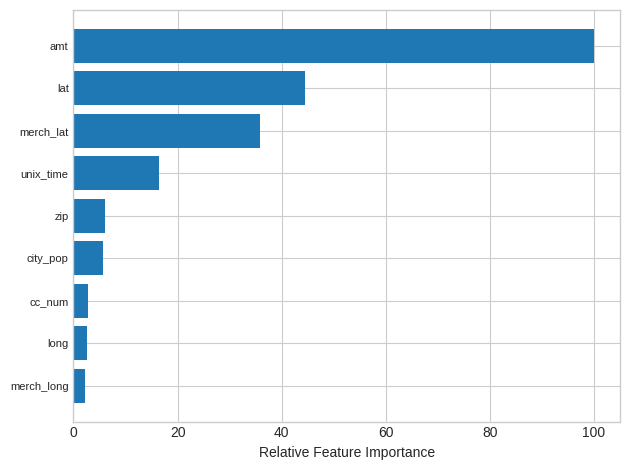

In [115]:
#Scale your data
scaler = StandardScaler()
scaler.fit(X_trained_filtered)
X_scaled = pd.DataFrame(scaler.transform(X_trained_filtered),columns = X_trained_filtered.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled,y_trained_filtered)

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_trained_filtered.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()

In [100]:
num_cv_iterations = 5
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                        random_state=123,
                        test_size  = 0.2)

print(cv_object)

ShuffleSplit(n_splits=5, random_state=123, test_size=0.2, train_size=None)


In [102]:
cvl_score_sf = cross_val_score(lr_clf_tunned,X_test_filtered,y_test_filtered,cv=cv_object,scoring='accuracy')
print('Cross Validation Score Accuracy: ',cvl_score_sf)

Cross Validation Score Accuracy:  [0.99433166 0.99411958 0.99405788 0.99391521 0.99414271]


In [103]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (cvl_score_sf.mean(), cvl_score_sf.std()))

0.9941 accuracy with a standard deviation of 0.0001


In [104]:
cm=confusion_matrix(y_test_filtered,y_hat)
cm

array([[553574,      0],
       [  2145,      0]])

In [105]:
cm/np.sum(cm)

array([[0.99614014, 0.        ],
       [0.00385986, 0.        ]])

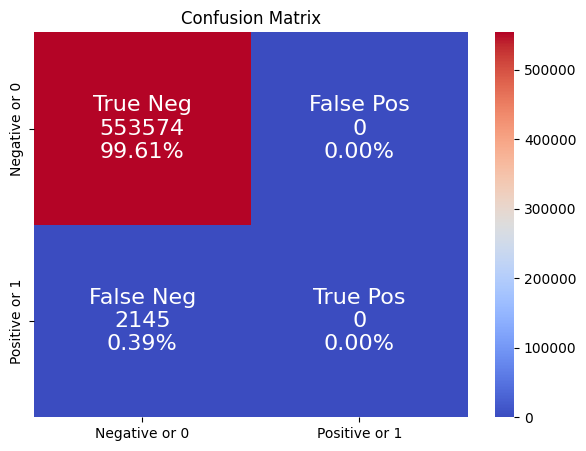

In [106]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{var1}\n{var2}\n{var3}" for var1,var2,var3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(7,5))
sns.heatmap(cm,
            annot=labels,
            fmt='',
            cmap='coolwarm',
            xticklabels=['Negative or 0','Positive or 1'],
            yticklabels=['Negative or 0','Positive or 1'],
            annot_kws={'size':16})
plt.title('Confusion Matrix')
plt.show()

In [107]:
print('Logistic Regression Classification Precission Is= ', mt.precision_score(y_test_filtered,y_hat))

Logistic Regression Classification Precission Is=  0.0


In [108]:
print('Logistic Regression Classification Recall Is=', mt.recall_score(y_test_filtered,y_hat))

Logistic Regression Classification Recall Is= 0.0


In [109]:
print('Logistic Reg Classificatin Report:\n')
print(mt.classification_report(y_test_filtered,y_hat))

Logistic Reg Classificatin Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [110]:
rf_roc_auc = roc_auc_score(y_test_filtered,y_hat)
print('LR ROC:',rf_roc_auc)

LR ROC: 0.5


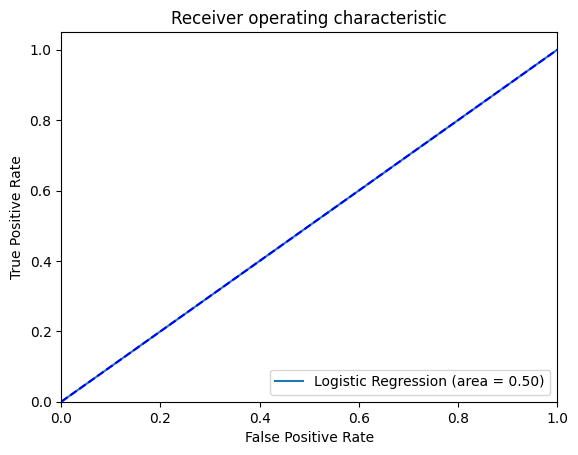

In [111]:
# plot the ROC curve from SMOTE Balanced logistic regression
logit_roc_auc = roc_auc_score(y_test_filtered, y_hat)
fpr, tpr, thresholds = roc_curve(y_test_filtered, y_hat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [117]:
# Create pandas series of features weight and column names
features_weights_pds = pd.Series(lr_clf_tunned.coef_[0],index=X_trained_filtered.columns)
# Arrage features weights in descending order
features_weights_pds=features_weights_pds.sort_values(ascending=False)


In [118]:
# Get only top 20 featuures
top_20_features=features_weights_pds.head(20)

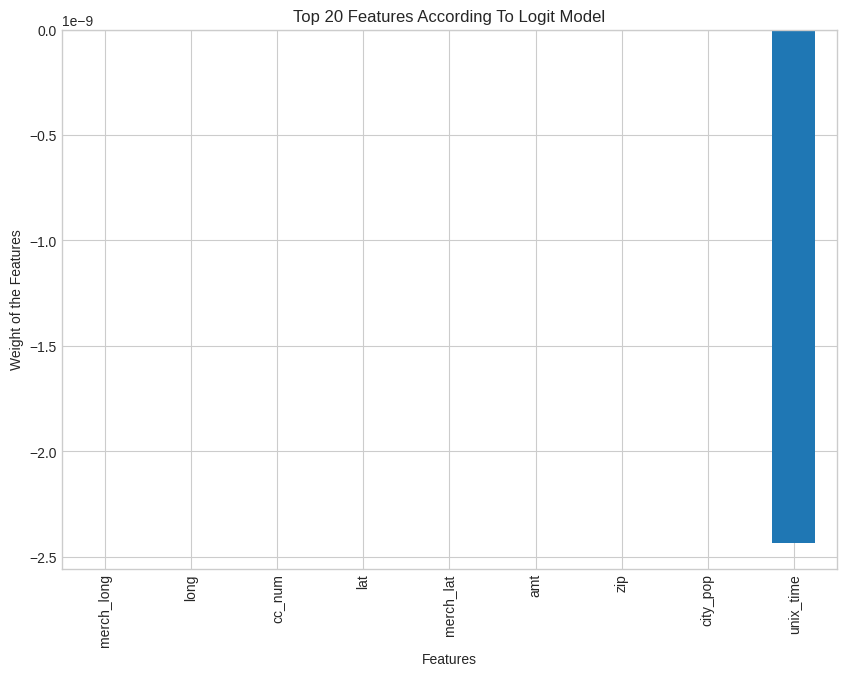

In [119]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
top_20_features.plot(kind='bar',)
plt.xlabel('Features')
plt.ylabel('Weight of the Features')
plt.title('Top 20 Features According To Logit Model')
plt.show()

In [ ]:
# Splitting Target Is Fraud and Predictors
#index_cols = ['cc_num']
response = 'is_fraud'
X_train, y_train = train.drop(response, axis=1), train[response]
print(X_train.shape, y_train.shape)

(1296675, 21) (1296675,)


In [ ]:
X_test, y_test = test.drop(response, axis=1), test[response]
print(X_test.shape, y_test.shape)

(555719, 21) (555719,)


In [ ]:
dtrain, dtest = xgb.DMatrix(data = X_trained_filtered, label = y_trained_filtered), xgb.DMatrix(data=X_test_filtered, label = y_test_filtered)

params = {"objective":"binary:logistic", 'colsample_bytree':0.3, 'alpha':10}

parameters = {'objective': 'binary:logistic',
  'colsample_bytree': 0.9,
  'alpha': 10,
  'max_depth': 8,
  'min_child_weight': 9,
  'subsample': 0.7,
  'enable_categorical':True,
  'eta': 0.1}

model = xgb.train( params,
    dtrain,
    num_boost_round=999,
    evals=[(dtest, "Test")],
    early_stopping_rounds=15
)

[0]	Test-error:0.00386
Will train until Test-error hasn't improved in 15 rounds.
[1]	Test-error:0.00386
[2]	Test-error:0.00386
[3]	Test-error:0.00304
[4]	Test-error:0.00386
[5]	Test-error:0.00386
[6]	Test-error:0.00386
[7]	Test-error:0.00386
[8]	Test-error:0.00386
[9]	Test-error:0.00386
[10]	Test-error:0.00386
[11]	Test-error:0.00353
[12]	Test-error:0.00344
[13]	Test-error:0.00352
[14]	Test-error:0.00358
[15]	Test-error:0.00346
[16]	Test-error:0.00354
[17]	Test-error:0.00327
[18]	Test-error:0.00347
Stopping. Best iteration:
[3]	Test-error:0.00304



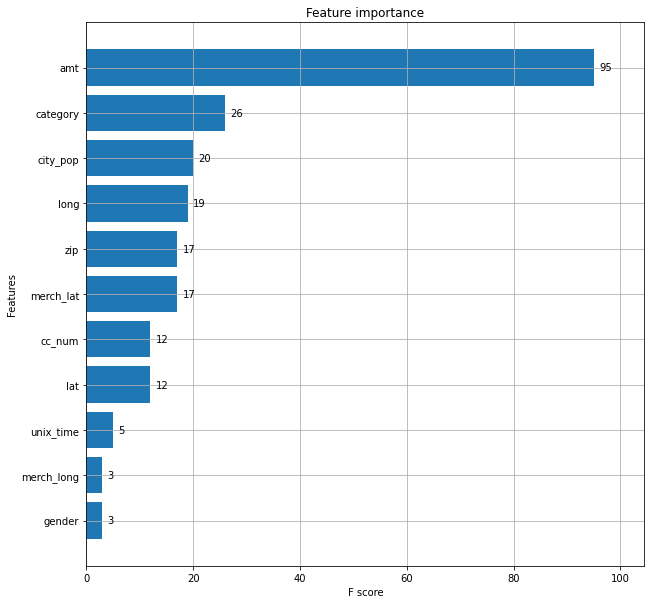

In [ ]:
#Features Important Plot provides clearly provides importance of each predictors
feature_importance_plot(model, max_features=15,height= 0.8)

### The Above Plot shows Importance Features UnixTime and lat, Long not important compared to others

### Features Summary Report [See later section/blocks]

In [ ]:
logreg = LogisticRegression()
rfe_full = RFE(logreg, n_features_to_select=20,step=1)
#Feed scalled features into rfe
rfe_full = rfe_full.fit(X_train,y_train)
#Cannot Fit with Timestamp

In [ ]:
for f,i in zip(X_train.columns.values,rfe_full.ranking_):
    print('Feature Name:',f,'Important Rank', '--->',i)
#Need to only use selected features ,so dropped then used X_trained_filtered and y_trained_filtered used previous  blocks and got Feature Importance Report

In [ ]:
#Getting Summary Report
logit_model  = sm.Logit(X_train_rus,y_train_rus)
results = logit_model.fit()
print(results.summary2())

In [ ]:
# Obtain model predictions
predicted_rus = model_lr_rus.predict(X_test_rus)


### Feature Selection Summary Report

In [ ]:
logreg = LogisticRegression()
rfe_ros = RFE(logreg, n_features_to_select=20,step=1)
# Feed scalled features into rfe
rfe = rfe_ros.fit(X_train_rus,y_train_rus)

In [ ]:
for f,i in zip(X_train_rus.columns.values,rfe.ranking_):
    print('Feature Name:',f,'Important Rank', '--->',i)

Feature Name: cc_num Important Rank ---> 1
Feature Name: amt Important Rank ---> 1
Feature Name: zip Important Rank ---> 1
Feature Name: lat Important Rank ---> 1
Feature Name: long Important Rank ---> 1
Feature Name: city_pop Important Rank ---> 1
Feature Name: unix_time Important Rank ---> 1
Feature Name: merch_lat Important Rank ---> 1
Feature Name: merch_long Important Rank ---> 1
Feature Name: is_fraud Important Rank ---> 1
Feature Name: gender Important Rank ---> 1
Feature Name: category Important Rank ---> 1


### Models Predictors and Feature Selection and Validation

### Training/Testing Data Preparation

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [ ]:

train = df[df['trans_date_trans_time']<=pd.to_datetime('2020-06-21 12:13:37')]
test  = df[df['trans_date_trans_time']>=pd.to_datetime('2020-06-21 12:14:25')]

print('Shape of Dataset =', train.shape, test.shape)
print('Mean Fraud Rate  =', train['is_fraud'].mean(), test['is_fraud'].mean())


Shape of Dataset = (1296675, 22) (555719, 22)
Mean Fraud Rate  = 0.005788651743883394 0.0038598644278853163


In [ ]:
train.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [ ]:
# Splitting Target Is Fraud and Predictors
#index_cols = ['cc_num']
response = 'is_fraud'
X_train, y_train = train.drop(response, axis=1), train[response]
print(X_train.shape, y_train.shape)

(1296675, 21) (1296675,)


In [ ]:
X_test, y_test = test.drop(response, axis=1), test[response]
print(X_test.shape, y_test.shape)

(555719, 21) (555719,)


#### Still XGBoost with out encoding categorical variable only experiment support not supported in Stable Version even enable_categorical=True
'''ValueError: Experimental support for categorical data is not implemented for current tree method yet.'''


### Encoding train and test's Gender and Category Values because of XGBoost not directly accepting Categorical Variables'''

### Creating Train and Test Data only with Category and gender Categorical and Numerical Variables for Train and Test

In [ ]:
#Filtering Data All Numerical Variables With Gender and Category, Since Other Categorical Variables are toomany Unique Values
train_filtered=train[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud','category','gender']]

In [ ]:
CharEncoder(train_filtered)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category,gender
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,8,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,4,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,2,1
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0,0,1
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0,1,1
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0,1,1
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0,1,1


In [ ]:
train_filtered.shape

(1296675, 12)

In [ ]:
responsetrain_filtered = 'is_fraud'
X_trained_filtered, y_trained_filtered = train_filtered.drop(responsetrain_filtered, axis=1), train[responsetrain_filtered]
print(X_trained_filtered.shape, y_trained_filtered.shape)

(1296675, 11) (1296675,)


In [ ]:
test_filtered=test[['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud','category','gender']]

In [ ]:
CharEncoder(test_filtered)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,category,gender
1296675,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,10,1
1296676,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,10,0
1296677,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,5,0
1296678,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,9,1
1296679,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,5,1
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,7,1
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,7,0
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,13,1


In [ ]:
test_filtered.shape

(555719, 12)

In [ ]:
responsetest_filtered = 'is_fraud'
X_test_filtered, y_test_filtered = test_filtered.drop(responsetest_filtered, axis=1), test_filtered[responsetest_filtered]
print(X_test_filtered.shape, y_test_filtered.shape)

(555719, 11) (555719,)


In [ ]:
X_test_filtered

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,category,gender
1296675,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,10,1
1296676,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,10,0
1296677,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,5,0
1296678,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,9,1
1296679,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,13,1
...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,5,1
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,7,1
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,7,0
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,13,1


## Features Selection Validation/ Features Importance and  Summary Report

### Feature Selection
##### Recursive Feature Elimination(RFE)
The feature selection used in python is Recursive Feature Elimination(RFE), which recursively selects smaller and smaller amount of features until the final recommended features are selected.

In [ ]:
#Recursive Feature Elimination to identify features
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20,step=1)
# Feed scalled features into rfe
rfe = rfe.fit(X_trained_filtered,y_trained_filtered)

In [ ]:
for f,i in zip(X_trained_filtered.columns.values,rfe.ranking_):
    print('Feature Name:',f,'Important Rank', '--->',i)

Feature Name: cc_num Important Rank ---> 1
Feature Name: amt Important Rank ---> 1
Feature Name: zip Important Rank ---> 1
Feature Name: lat Important Rank ---> 1
Feature Name: long Important Rank ---> 1
Feature Name: city_pop Important Rank ---> 1
Feature Name: unix_time Important Rank ---> 1
Feature Name: merch_lat Important Rank ---> 1
Feature Name: merch_long Important Rank ---> 1
Feature Name: category Important Rank ---> 1
Feature Name: gender Important Rank ---> 1


In [ ]:
#Getting Summary Report
logit_model  = sm.Logit(y_trained_filtered,X_trained_filtered)
results = logit_model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.032000
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.101     
Dependent Variable: is_fraud         AIC:              82996.3091
Date:               2023-10-25 04:52 BIC:              83044.6103
No. Observations:   1296675          Log-Likelihood:   -41494.   
Df Model:           3                LL-Null:          -46154.   
Df Residuals:       1296671          LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
cc_num       -0.0000    0.0000   -1.0962  0.2730  -0.0000   0.0000
amt           0.0027    0.0000   84.7536  0.0000   0.0026   0.

### Found Zip , cc_num lat, long, merch_long and mech_lat not influencing much on finding is fraud or not'''

## Feature Selection /Engineering Findings/Summary

### 1)Features Category and Gender only able to Encode ,but other features no influence in target as well as over 700 or hundred of factors level not able to encode

### 2)Features Selections Report and Summary Report Already Provided

### 3)Grid Search CV Hyper Parameters Used

### 4)Lasso, Ridge and Elastic Net Regularization Used

### 5) Used above features in the Model


### **6) Logistic Regression Model with Balanced SMOTE with Grid Search Hyper Parameteres and Lasso, Ridge ,Elastic Net Regularization model used and got my all Performance Metrics also got in this Note Book,
### which was was missed in my Model Notebook

### 7) Balanced SMOTE Model with Logistic Regression in this Notebook

## Future Work

### 1)If We have Transactions Locations Lat and Long able to get from Browser Cookies or if used Chrome Browser able to get from Google Analytics then using Havershine Distance able to find out distance which are outside of United States would help to mark as Fraudulent Transaction Easily
### Can be used as one of the important Feature